<a href="https://colab.research.google.com/github/keerthanakkumar/Palmer-Penguins-Prediction/blob/main/Palmer_Penguins_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PALMER PENGUINS**

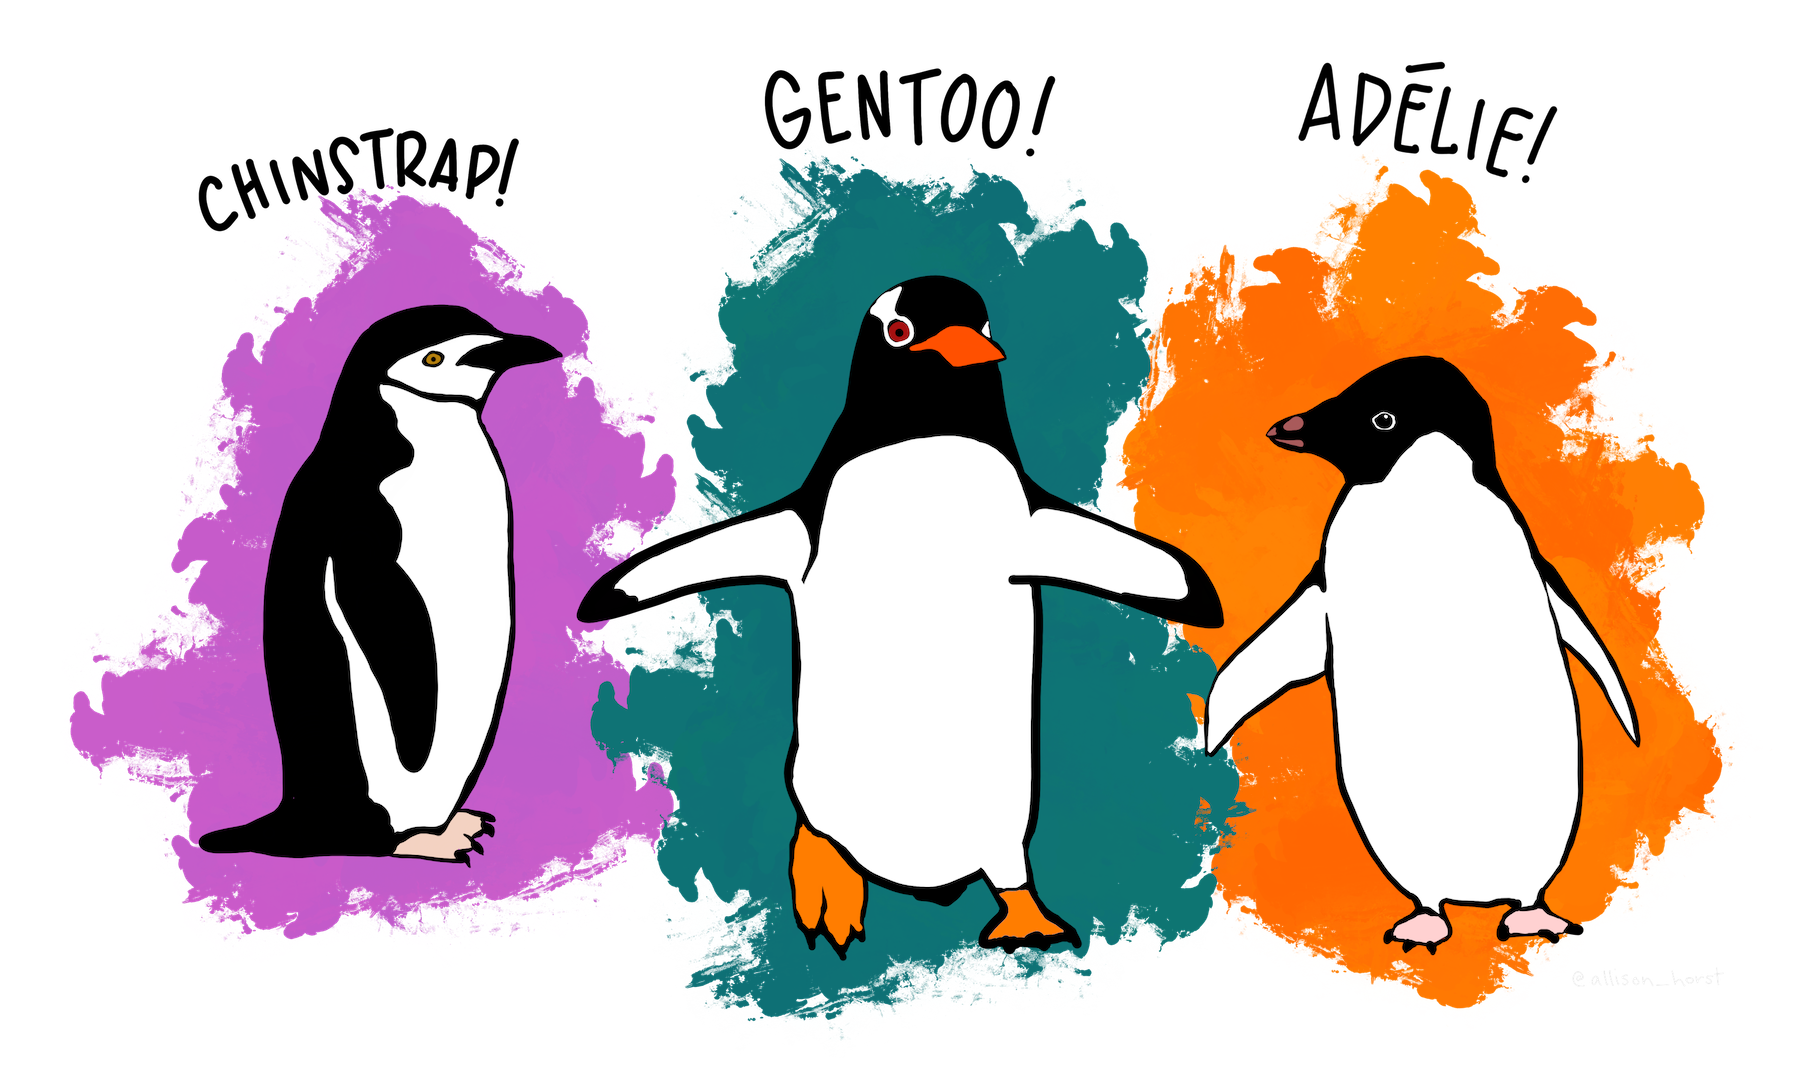

## IMPORT LIBRARIES

In [248]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

## LOAD DATA

In [249]:
penguins = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-28/penguins.csv')

In [250]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [251]:
df = penguins.copy()

## DATA PREPROCESSING

In [252]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [253]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [255]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [256]:
df.shape

(344, 8)

In [257]:
df.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
year                 344
dtype: int64

In [258]:
df.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
year                   3
dtype: int64

In [259]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## CREATE CLEANED CSV FILE

In [260]:
df1 = df.dropna(axis=0)
df1.drop(columns=['year'],inplace=True)

<ipython-input-260-d750b9190c37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['year'],inplace=True)


In [261]:
df1.shape

(333, 7)

10 rows are removed

In [262]:
df1.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [263]:
df1.to_csv('penguins_cleaned')
# for creating app

In [264]:
df1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


## DATA VISUALIZATION

In [265]:
# setting graph format
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 9
plt.rcParams['figure.figsize'] = (8,7)
plt.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams['lines.linewidth'] = 2

([<matplotlib.patches.Wedge at 0x7c5eb0477d60>,
 [Text(0.21141770592664771, 1.0794918034059888, 'Adelie'),
  Text(-0.8153728172890797, -0.7383543653463893, 'Chinstrap'),
  Text(0.8813015780969663, -0.6582609880919552, 'Gentoo')],
 [Text(0.11531874868726237, 0.588813710948721, '43.8%'),
  Text(-0.44474880943040707, -0.40273874473439414, '35.7%'),
  Text(0.48070995168925423, -0.3590514480501573, '20.4%')])

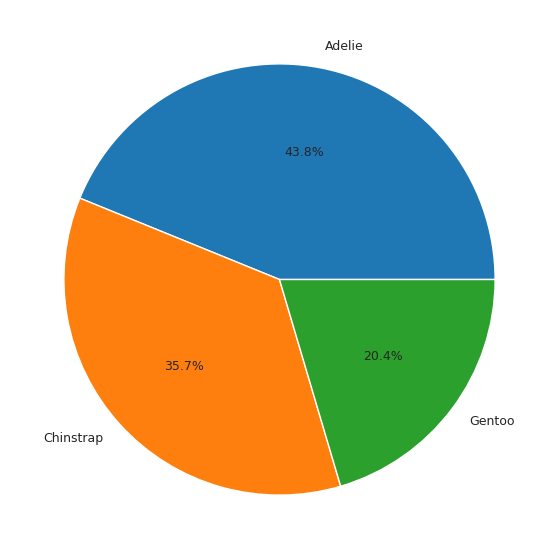

In [266]:
# Species
labels = ['Adelie', 'Chinstrap', 'Gentoo']
plt.pie(df1['species'].value_counts(), autopct='%1.1f%%', labels=labels)

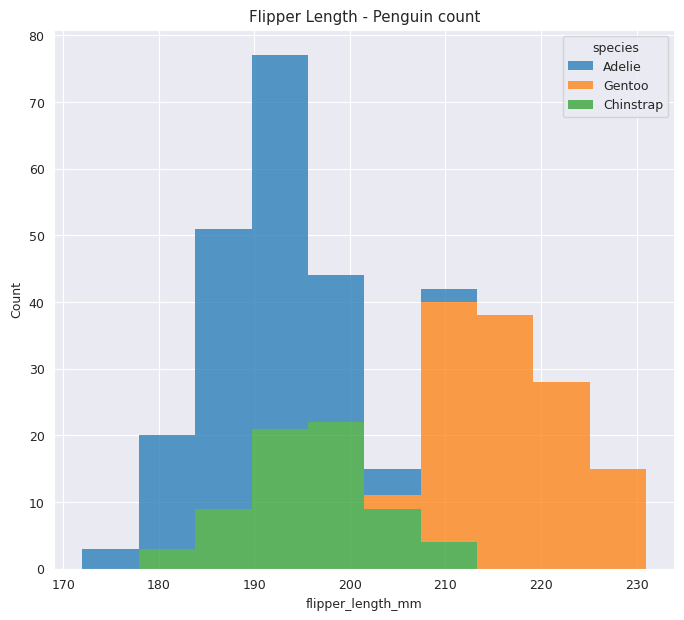

In [267]:
# Flipper Length - Penguin count
plt.title('Flipper Length - Penguin count')
sns.histplot(x=df1['flipper_length_mm'],hue=df1['species'],multiple='stack',edgecolor='None')
plt.show()

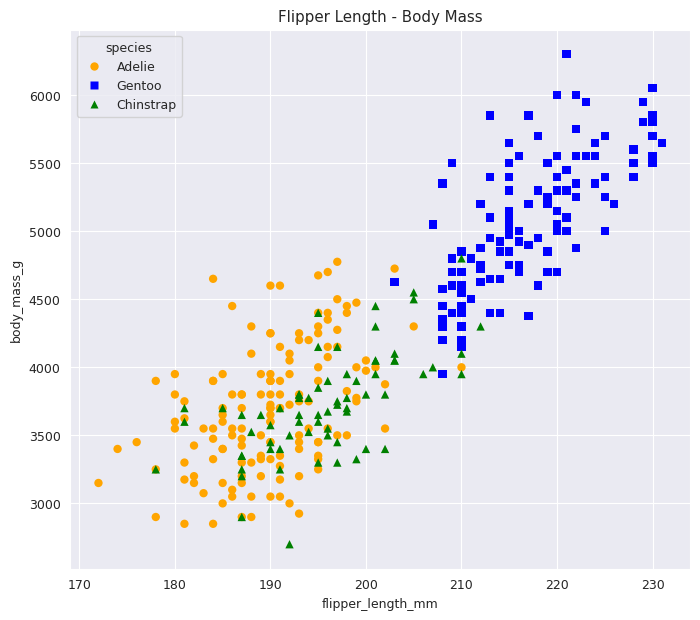

In [268]:
# Flipper Length - Body Mass
plt.title('Flipper Length - Body Mass')
markers = {'Adelie': 'o', 'Gentoo': 's', 'Chinstrap': '^'}
colors = {'Adelie': 'orange', 'Gentoo': 'blue', 'Chinstrap': 'green'}
sns.scatterplot(x='flipper_length_mm',
                y='body_mass_g',
                hue='species',
                style='species',
                markers=markers,
                data=df1,
                edgecolor='None',
                palette=colors)

plt.show()

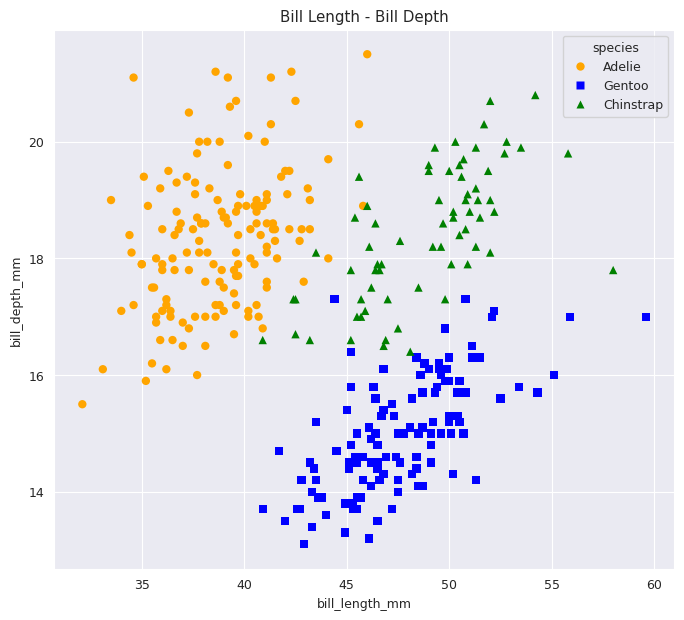

In [269]:
# Bill Length - Bill Depth
plt.title('Bill Length - Bill Depth')
markers = {'Adelie': 'o', 'Gentoo': 's', 'Chinstrap': '^'}
colors = {'Adelie': 'orange', 'Gentoo': 'blue', 'Chinstrap': 'green'}
sns.scatterplot(x='bill_length_mm',
                y='bill_depth_mm',
                hue='species',
                style='species',
                markers=markers,
                data=df1,
                edgecolor='None',
                palette=colors)

plt.show()

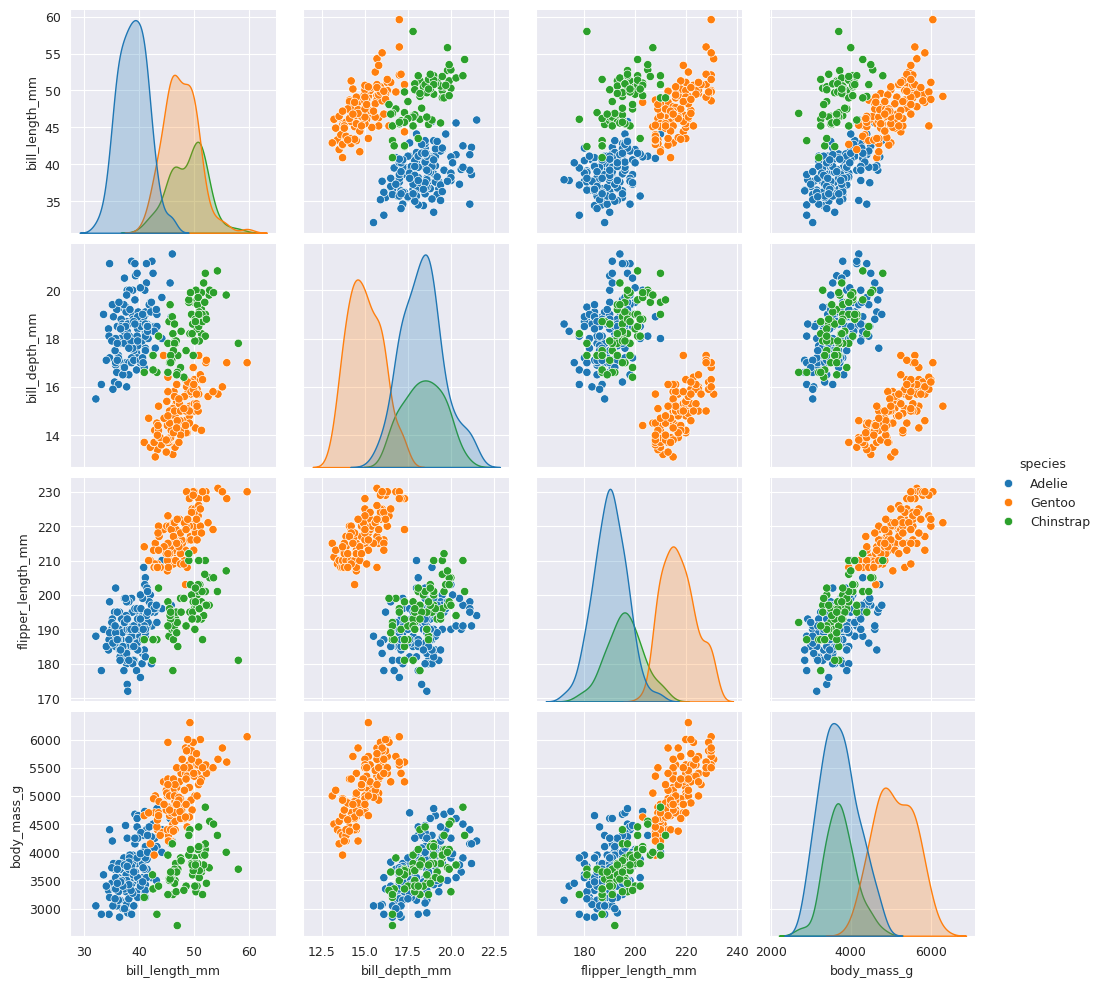

In [270]:
# pair plot of species
sns.pairplot(df1,hue='species')

<Axes: >

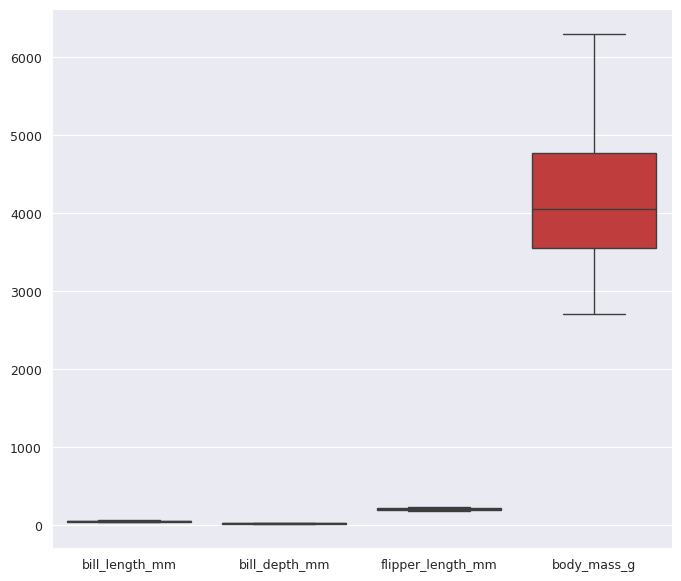

In [271]:
sns.boxplot(data=df1)

Here we can understand that there are no outliers

## DATA PROCESSING

- Encode data

- Split data

- Train test data

- Model creation

- Perfomance evaluation

In [272]:
target = 'species'         # output
encode = ['sex','island']  # to encode

In [273]:
# Encoding
for col in encode:
    dummy = pd.get_dummies(df1[col], prefix=col)
    df1 = pd.concat([df1,dummy], axis=1)
    del df1[col]

In [274]:
target_mapper = {'Adelie':0, 'Chinstrap':1, 'Gentoo':2}
def target_encode(val):
    return target_mapper[val]

In [275]:
df1['species'] = df1['species'].apply(target_encode)

In [276]:
# Separating x and y
x = df1.drop('species', axis=1)
y = df1['species']

In [277]:
# train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [278]:
# Build random forest model
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
pred=clf.predict(x_test)

In [279]:
# Saving the model
import joblib
joblib.dump(clf, 'saved_model')

['saved_model']

In [280]:
# Perfomance Evaluation
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
matrix = confusion_matrix(y_test,pred)
matrix

array([[31,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 18]])

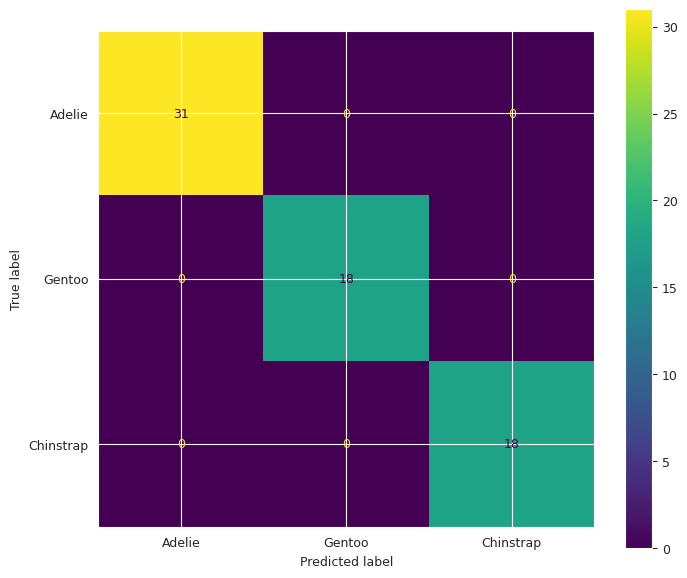

In [281]:
from sklearn.metrics import ConfusionMatrixDisplay
label=['Adelie', 'Gentoo', 'Chinstrap']
display =ConfusionMatrixDisplay(matrix,display_labels=label)
display.plot()

In [282]:
score = accuracy_score(y_test,pred)
score

1.0

Since we have best score we do not have to hyper tune this model